<a href="https://colab.research.google.com/github/JanakiRamanT17/Data-Scientist-Trainee-Project/blob/main/Project_1_Customer_Segmentation_using_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis (EDA)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Mall_Customers.csv")

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,44.405000,81.215000,48.360000
std,57.879185,15.353816,38.864134,28.791058
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,32.750000,46.000000,23.000000
50%,100.500000,46.000000,80.500000,48.000000
75%,150.250000,56.000000,114.000000,74.000000
max,200.000000,69.000000,149.000000,100.000000


**Age Distribution**

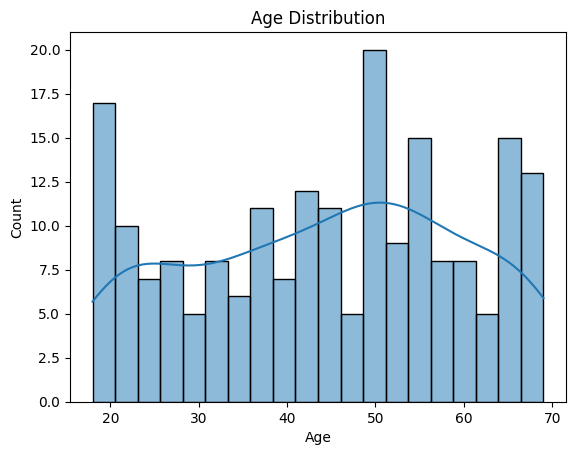

In [ ]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

**Income Distribution**

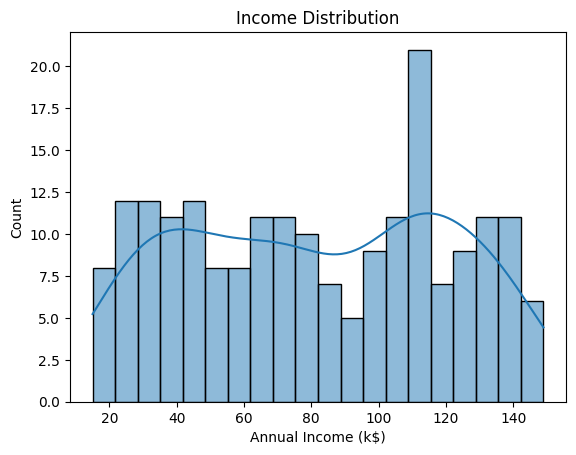

In [ ]:
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title("Income Distribution")
plt.show()

**Spending Score Distribution**

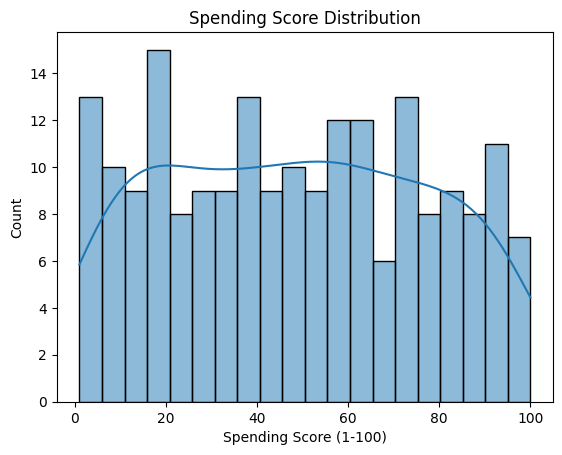

In [ ]:
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.show()

**Relationship Exploration**

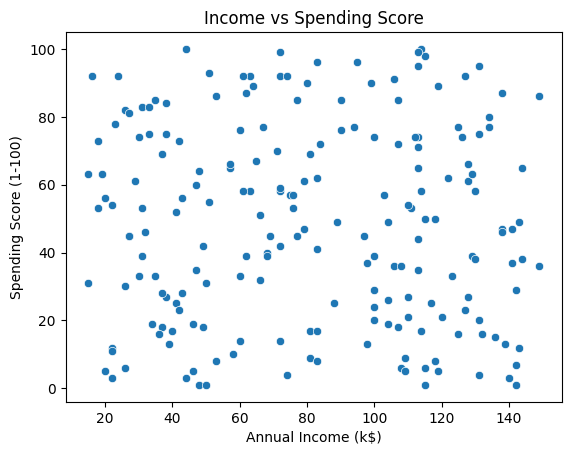

In [ ]:
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=df
)
plt.title("Income vs Spending Score")
plt.show()

**Prepare Data**

In [ ]:
from sklearn.cluster import KMeans

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

**Elbow Method (Find Optimal K)**

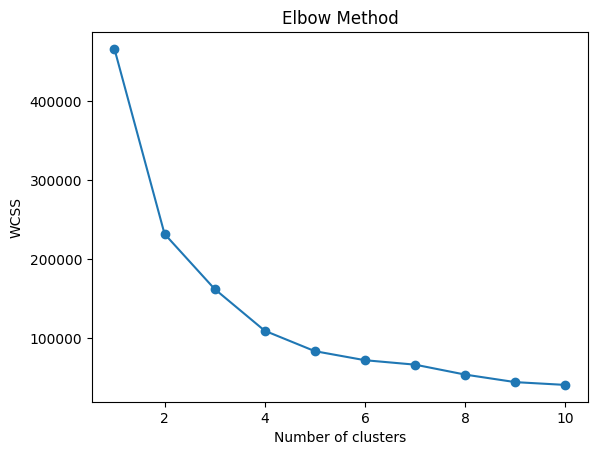

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Fit Final Model**

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

**Visualize Clusters (Income vs Spending Score)**

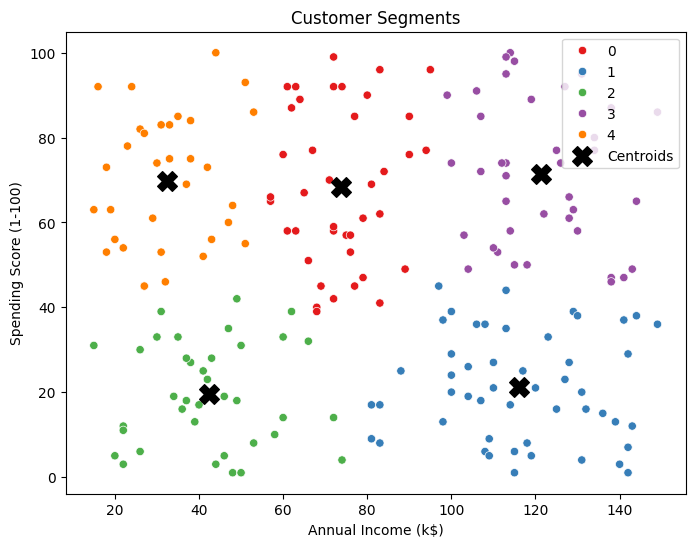

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=df
)

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title("Customer Segments")
plt.legend()
plt.show()